- 생존자 중 성별 비율 시각화
- 나이별 생존자의 성별 비율 비교 시각화
    
    *하나의 figure에 모두 표시

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
file1='titanic.csv'
dataDF=pd.read_csv(file1)
dataDF.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [6]:
# 결측치 확인
dataDF.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
dataDF1=dataDF[['survived','sex','age']]
dataDF1

,survived,sex,age
0,0,male,22.0
1,1,female,38.0
2,1,female,26.0
3,1,female,35.0
4,0,male,35.0
...,...,...,...
886,0,male,27.0
887,1,female,19.0
888,0,female,NaN
889,1,male,26.0


In [8]:
# age의 빈 칸은 나이의 중앙값을 넣기로 함
dataDF1['age']=dataDF1['age'].fillna(dataDF1['age'].median())
dataDF1.isna().sum()

C:\Users\kdp\AppData\Local\Temp\ipykernel_11680\2141922166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataDF1['age']=dataDF1['age'].fillna(dataDF1['age'].median())


survived    0
sex         0
age         0
dtype: int64

In [21]:
dataDF1['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [10]:
survivor=dataDF1[dataDF1['survived']==1]

In [11]:
gendercount=survivor['sex'].value_counts()
gendercount

sex
female    233
male      109
Name: count, dtype: int64

In [20]:
genderratio=survivor['sex'].value_counts(normalize=True)
genderratio

sex
female    0.681287
male      0.318713
Name: proportion, dtype: float64

In [13]:
# 한글폰트
from matplotlib import font_manager as fm, rc


Font_File=r'C:\Windows\Fonts\malgun.ttf'


font_name=fm.FontProperties(fname=Font_File).get_name()


rc('font',family=font_name)

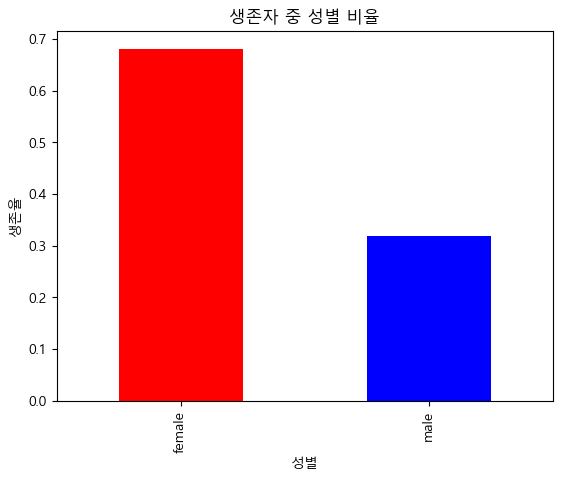

In [14]:
genderratio.plot(kind='bar', color=['r','b'])
plt.title('생존자 중 성별 비율')
plt.ylabel('생존율')
plt.xlabel('성별')
plt.show()

In [15]:
dataDF1['age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [16]:
ages=pd.cut(dataDF1['age'],bins=[0,10,20,30,40,50,60,70,80], labels=['10대이하','10대','20대','30대','40대','50대','60대','70대'])
ages

0      20대
1      30대
2      20대
3      30대
4      30대
      ... 
886    20대
887    10대
888    20대
889    20대
890    30대
Name: age, Length: 891, dtype: category
Categories (8, object): ['10대이하' < '10대' < '20대' < '30대' < '40대' < '50대' < '60대' < '70대']

In [17]:
dataDF2=survivor.groupby(ages)['sex'].value_counts(normalize=True)
dataDF2

C:\Users\kdp\AppData\Local\Temp\ipykernel_11680\2898991862.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataDF2=survivor.groupby(ages)['sex'].value_counts(normalize=True)


age    sex   
10대이하  female    0.500000
       male      0.500000
10대    female    0.772727
       male      0.227273
20대    female    0.713235
       male      0.286765
30대    female    0.666667
       male      0.333333
40대    female    0.636364
       male      0.363636
50대    female    0.764706
       male      0.235294
60대    female    0.750000
       male      0.250000
70대    male      1.000000
       female    0.000000
Name: proportion, dtype: float64

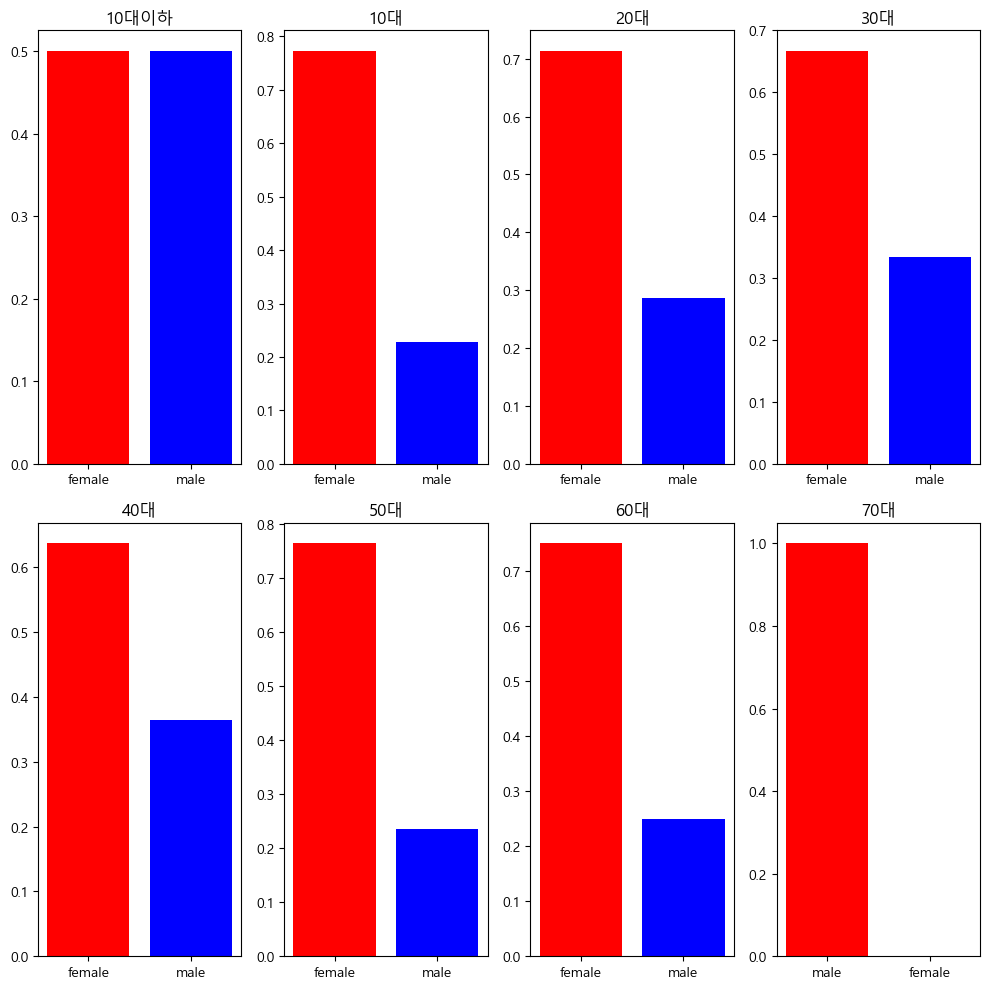

In [23]:
fig=plt.figure(figsize=(10,10))

ax1=fig.add_subplot(2,4,1)
ax2=fig.add_subplot(2,4,2)
ax3=fig.add_subplot(2,4,3)
ax4=fig.add_subplot(2,4,4)
ax5=fig.add_subplot(2,4,5)
ax6=fig.add_subplot(2,4,6)
ax7=fig.add_subplot(2,4,7)
ax8=fig.add_subplot(2,4,8)

ax1.bar(dataDF2.loc['10대이하'].index,dataDF2.values[0:2], color=['r','b'])
ax2.bar(dataDF2.loc['10대'].index,dataDF2.values[2:4], color=['r','b'])
ax3.bar(dataDF2.loc['20대'].index,dataDF2.values[4:6], color=['r','b'])
ax4.bar(dataDF2.loc['30대'].index,dataDF2.values[6:8], color=['r','b'])
ax5.bar(dataDF2.loc['40대'].index,dataDF2.values[8:10], color=['r','b'])
ax6.bar(dataDF2.loc['50대'].index,dataDF2.values[10:12], color=['r','b'])
ax7.bar(dataDF2.loc['60대'].index,dataDF2.values[12:14], color=['r','b'])
ax8.bar(dataDF2.loc['70대'].index,dataDF2.values[14:16], color=['r','b'])
ax1.set_title('10대이하')
ax2.set_title('10대')
ax3.set_title('20대')
ax4.set_title('30대')
ax5.set_title('40대')
ax6.set_title('50대')
ax7.set_title('60대')
ax8.set_title('70대')
plt.tight_layout()
plt.show()
